In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('data.csv')
df = df[df['ignore'] == False]
df['time_in_secs'] = df['time'].apply(lambda x: x.split(':')).apply(lambda x:int(x[0])* 360 + int(x[1])* 60 + int(x[2]))

In [4]:
df.count()

Unnamed: 0         38402
id                 38402
name               38402
age                38402
rank               38402
time               38402
pace               38402
year               38402
male               38402
ignore             38402
run_count          38402
years_since_run    38402
time_in_secs       38402
dtype: int64

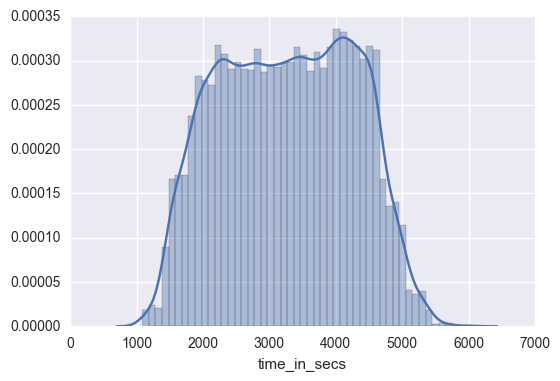

In [5]:
sns.distplot(df.time_in_secs)

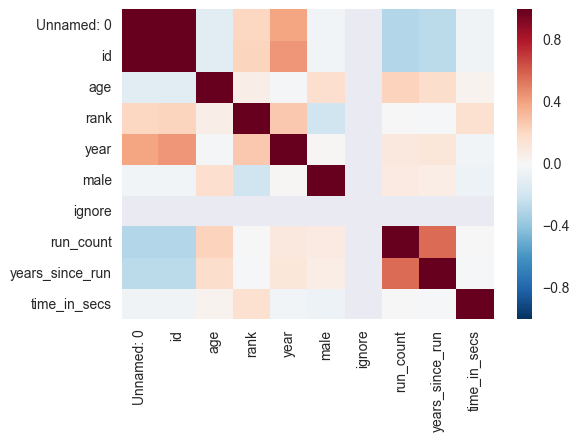

In [6]:
sns.heatmap(df.corr())

In [8]:
df

,Unnamed: 0,id,name,age,rank,time,pace,year,male,ignore,run_count,years_since_run,time_in_secs
0,0,1,carlos enrique portugal quintero,30,1263,04:15:00,09:44,2016,1,False,0,-1,2340
1,1,2,leonel furlan,60,2289,05:05:42,11:41,2016,1,False,0,-1,2142
2,2,3,meredith gray,30,2276,05:04:34,11:38,2016,0,False,0,-1,2074
3,3,4,jason ainspan,35,670,03:52:57,08:53,2015,1,False,0,-1,4257
4,4,4,jason ainspan,35,2390,05:13:30,11:58,2016,1,False,1,1,2610
5,5,5,marcela todd,40,2608,05:28:34,12:33,2016,0,False,8,2,3514
6,6,5,marcela todd,42,3086,05:43:14,13:06,2014,0,False,7,2,4394
7,7,5,marcela todd,38,2455,05:29:04,12:33,2010,0,False,4,1,3544
8,8,5,marcela todd,36,2343,05:28:49,12:33,2008,0,False,2,1,3529
9,9,5,marcela todd,37,2415,05:27:27,12:29,2009,0,False,3,1,3447


In [7]:
# x array of features
df.columns

Index([u'Unnamed: 0', u'id', u'name', u'age', u'rank', u'time', u'pace',
       u'year', u'male', u'ignore', u'run_count', u'years_since_run',
       u'time_in_secs'],
      dtype='object')

In [13]:
X = df[['age', 'rank','run_count']]

In [14]:
y = df['time_in_secs']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.3 , random_state = 101)
from sklearn.linear_model import LinearRegression
lm  = LinearRegression()
lm.fit(X_train,y_train)
# create df out of coeffecients
cdf = pd.DataFrame(lm.coef_ , X_train.columns , columns = ['Coeff'])
cdf

,Coeff
age,2.608943
rank,0.156776
run_count,-2.335236


In [17]:
#predict
predictions = lm.predict(X_test)

In [18]:
predictions

array([ 3239.16195109,  3256.78547952,  3294.95023943, ...,  3059.71471317,
        3468.38867202,  3597.4918367 ])

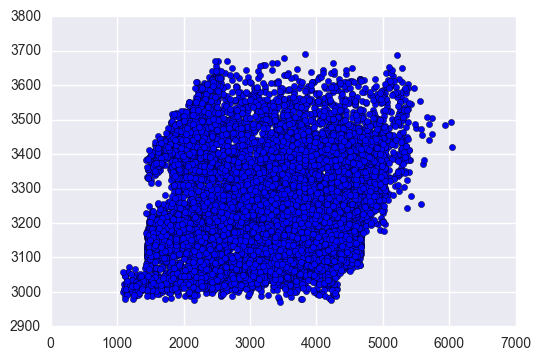

In [19]:
plt.scatter(y_test , predictions)

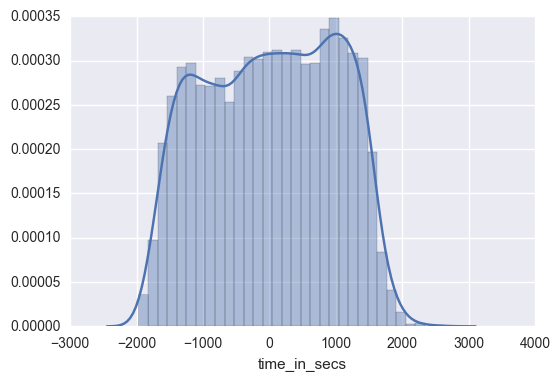

In [20]:
sns.distplot((y_test - predictions))

In [21]:
y_test.min()

1086

In [22]:
predictions.min()

2971.054805483172

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

('MAE:', 839.19765951596867)
('MSE:', 950776.85708160908)
('RMSE:', 975.07787231667248)
